In [153]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


In [324]:
from statsmodels.tsa.arima.model import ARIMA

In [325]:
!pip install pmdarima

In [337]:
!pip install matplotlib

In [345]:
from matplotlib import pyplot as plt

In [154]:
df = pd.read_csv('FULL AND FINAL .csv')

In [155]:
df.head()

,Date,Close
0,01-01-2008,341.21
1,02-01-2008,358.27
2,03-01-2008,359.81
3,04-01-2008,358.73
4,07-01-2008,354.08


In [156]:
df.isna().sum()

Date     0
Close    0
dtype: int64

In [157]:
df_1=df.dropna()

In [158]:
df_1.head()

,Date,Close
0,01-01-2008,341.21
1,02-01-2008,358.27
2,03-01-2008,359.81
3,04-01-2008,358.73
4,07-01-2008,354.08


In [159]:
df_1.isnull().sum()

Date     0
Close    0
dtype: int64

In [160]:
df_1.Date = pd.to_datetime(df_1.Date, dayfirst = True)

In [161]:
df_1.head()

,Date,Close
0,2008-01-01,341.21
1,2008-01-02,358.27
2,2008-01-03,359.81
3,2008-01-04,358.73
4,2008-01-07,354.08


In [162]:
df_1.set_index("Date")

,Close
Date,
2008-01-01,341.21
2008-01-02,358.27
2008-01-03,359.81
2008-01-04,358.73
2008-01-07,354.08
...,...
2023-01-17,3639.35
2023-01-18,3596.70
2023-01-19,3463.55


In [163]:
df_1.set_index("Date", inplace=True)

In [164]:
df_1.head()

,Close
Date,
2008-01-01,341.21
2008-01-02,358.27
2008-01-03,359.81
2008-01-04,358.73
2008-01-07,354.08


In [165]:
df_1=df_1.asfreq('MS')

In [166]:
df_1

,Close
Date,
2008-01-01,341.21
2008-02-01,244.55
2008-03-01,NaN
2008-04-01,169.89
2008-05-01,NaN
...,...
2022-09-01,3233.25
2022-10-01,NaN
2022-11-01,3575.70


In [167]:
df_1.isnull().sum().sum()

64

In [168]:
df_1.Close=df_1.Close.fillna(method='ffill')

In [169]:
df_1.isna().sum()

Close    0
dtype: int64

In [170]:
df_1.Close=df_1.Close.fillna(method='bfill')

In [171]:
df_1.isna().sum()

Close    0
dtype: int64

In [172]:
size=int(len(df_1)*.9)
size

162

In [229]:
df_train=df_1.Close.iloc[:size]
df_test=df_1.Close.iloc[size:]

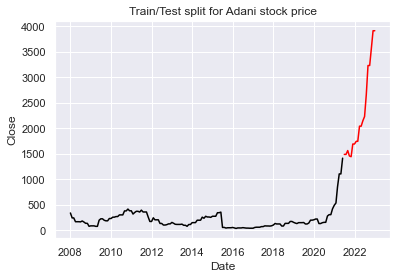

In [230]:
plt.plot(df_train,color = "black")
plt.plot(df_test,color = "red")
plt.title("Train/Test split for Adani stock price")
plt.ylabel("Close")
plt.xlabel("Date")
sns.set()
plt.show()

In [231]:
import statsmodels.tsa.stattools as sts 

In [232]:
sts.adfuller(df_train)

(0.1893325146783643,
 0.9716569003678348,
 7,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1585.247934010987)

In [233]:
import statsmodels.graphics.tsaplots as sgt

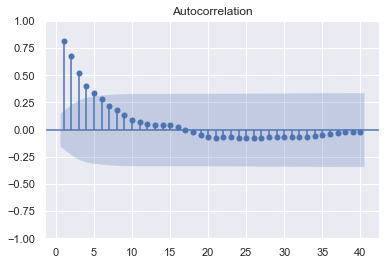

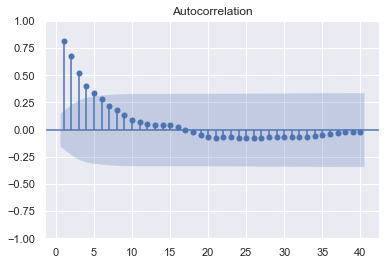

In [234]:
sgt.plot_acf(df_train,lags=40,zero=False)

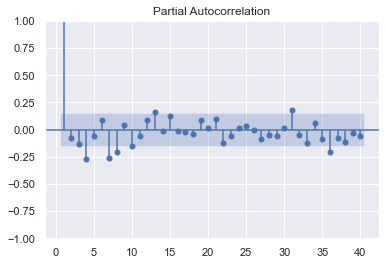

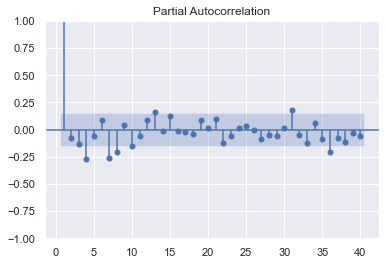

In [235]:
sgt.plot_pacf(df_train,lags=40,zero=False, method=('ols'))

In [236]:
from pmdarima.arima import auto_arima
model = auto_arima(df_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2150.778, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2003.146, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2280.196, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1772.570, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1768.243, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1922.373, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1756.642, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1752.868, Time=0.25 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1759.412, Time=0.27 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1758.152, Time=0

ARIMA(order=(4, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [237]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  162
Model:               SARIMAX(4, 0, 3)   Log Likelihood                -866.345
Date:                Tue, 24 Jan 2023   AIC                           1748.691
Time:                        20:36:15   BIC                           1773.391
Sample:                    01-01-2008   HQIC                          1758.719
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5305      0.111     13.807      0.000       1.313       1.748
ar.L2         -1.0811      0.116     -9.300      0.000      -1.309      -0.853
ar.L3          1.4353      0.117     12.249      0.000       1.206       1.665
ar.L4         -0.8924      0.123     -7.273      0.000      -1.133      -0.652
ma.L1         -0.3695      0.140     -2.634      0.008      -0.644      -0.095
ma.L2          0.7422      0.092      8.067      0.000       0.562       0.922
ma.L3         -0.6450      0.183     -3.529      0.000      -1.003      -0.287
sigma2      2611.2374    196.284     13.303      0.000    2226.529    2995.946
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1251.27
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.44
Prob(H) (two-sided):                  0.01   Kurtosis:                        16.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
forecast = model.predict(n_periods=len(df_test))
forecast = pd.DataFrame(forecast,index=df_test.index,columns=['Prediction'])

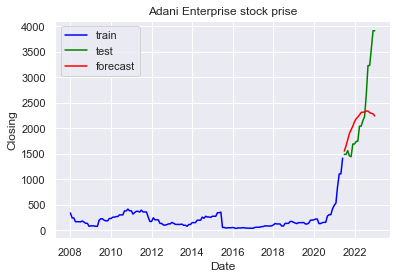

In [239]:
plt.plot(df_train, color="blue",label="Original Close")
plt.plot(df_test, color="green",label="Test")
plt.plot(forecast, color="red",label="forecast")
plt.title("Adani Enterprise stock prise")
plt.ylabel("Closing")
plt.xlabel("Date")
plt.legend(['train','test','forecast'])


In [240]:
pred=model.predict(start=len(df_1),n_periods=30)
pd1 = pd.DataFrame(pred,columns=['Prediction'])

In [241]:
pd1

,Prediction
2021-07-01,1555.006532
2021-08-01,1655.519703
2021-09-01,1778.455632
2021-10-01,1900.205987
2021-11-01,1974.081046
2021-12-01,2042.278387
2022-01-01,2131.830741
2022-02-01,2192.546004
2022-03-01,2220.615496
2022-04-01,2265.614512


In [242]:
pd1.isnull().sum()

Prediction    0
dtype: int64

In [243]:
pd1.astype(int, copy=True,errors='raise')

,Prediction
2021-07-01,1555
2021-08-01,1655
2021-09-01,1778
2021-10-01,1900
2021-11-01,1974
2021-12-01,2042
2022-01-01,2131
2022-02-01,2192
2022-03-01,2220
2022-04-01,2265


In [244]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df_test,forecast))
print("RMSE: ", rms)

RMSE:  735.9014072360385


In [347]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [348]:
start_date = "2008-01-01"
end_date = "2023-23-01"

In [350]:
df_auto_pred = pd1

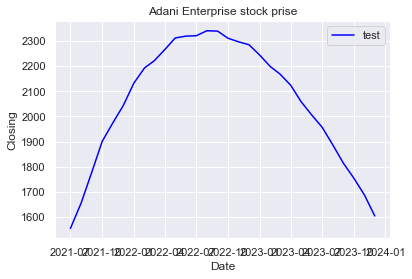

In [367]:
plt.plot(pd1, color="blue",label="Test")
plt.title("Adani Enterprise stock prise")
plt.ylabel("Closing")
plt.xlabel("Date")
plt.legend(['test','prediction'])